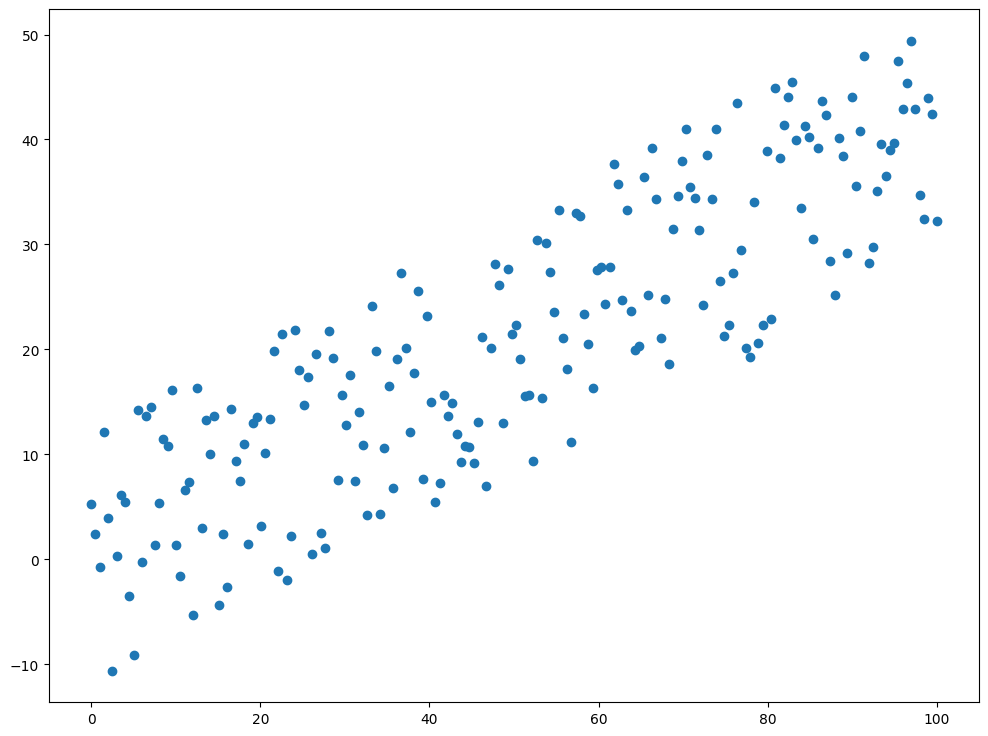

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = np.linspace(0, 100, 200)
delta = np.random.uniform(-15, 10, X.size)
Y = 0.4 * X + 3 + delta

plt.figure(figsize=(12, 9))
plt.scatter(X, Y)
plt.show()

### Update Weight:

We have to get the partial derivative of the MSE equation in terms of w:

Partial Derivative to find the weight: $\frac{\partial l}{\partial  w}=\frac{1}{N}\sum_{i=1}^N-2x_i(y_i-(wx_i+b))$

We can use this to update the weight per epoch by subtracting the partial derivative times a learning rate of $\alpha$ from the previous weight.

Find the weight per epoch: $w_i=w_{i-1}-(\alpha \cdot \frac{\partial l}{\partial  w_i})$

### Update Bias:

We have to get the partial derivative of the MSE equation in terms of b:

Partial Derivative to find the bias: $\frac{\partial l}{\partial  b}=\frac{1}{N}\sum_{i=1}^N-2(y_i-(wx_i+b))$

We can use this to update the bias per epoch by subtracting the partial derivative times a learning rate of $\alpha$ from the previous bias.

Find the bias per epoch: $b_i=b_{i-1}-(\alpha \cdot \frac{\partial l}{\partial  b_i})$


In [ ]:
class LinearRegressionGradientDescentModel:
    """
    This is a custom Linear Regression Model that uses the partial derivatives of the Mean-Squared Error function
    in terms of the weight and bias to predict the best possible y value. Linear Regression works best with the closed-form solution,
    but for learning processes, this model uses gradient descent.
    """

    def __init__(self, lr: float, epochs: int):
        self.w = 1
        self.b = 1
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, Y):
        data_len = float(len(X))

        # Perform gradient descent
        for epoch in range(self.epochs):
            # Get the current predicted value of Y
            y_pred = self.w * X + self.b

            # Compute the gradients

            D_w = (1 / data_len) * sum(-2 * X * (Y - y_pred))  # Derivative of w
            D_b = (1 / data_len) * sum(-2 * (Y - y_pred))  # Derivative of b

            self.w -= self.lr * D_w  # Update w
            self.b -= self.lr * D_b  # Update b

            # Get the loss
            loss = (1 / data_len) * sum((Y - y_pred) ** 2)

            # Print the loss
            if epoch % (self.epochs / 10) == 0:
                print(f"Epoch: {epoch} | Loss: {loss:.6f}")

        print(f"Weight: {self.w}")
        print(f"Bias: {self.b}")

    def predict(self, X):
        return self.w * X + self.b

Epoch: 0 | Loss: 1240.766248
Epoch: 1000 | Loss: 51.543165
Epoch: 2000 | Loss: 51.543061
Epoch: 3000 | Loss: 51.542967
Epoch: 4000 | Loss: 51.542882
Epoch: 5000 | Loss: 51.542805
Epoch: 6000 | Loss: 51.542735
Epoch: 7000 | Loss: 51.542672
Epoch: 8000 | Loss: 51.542615
Epoch: 9000 | Loss: 51.542564
Weight: 0.40399196924766695
Bias: 0.9637335585905136


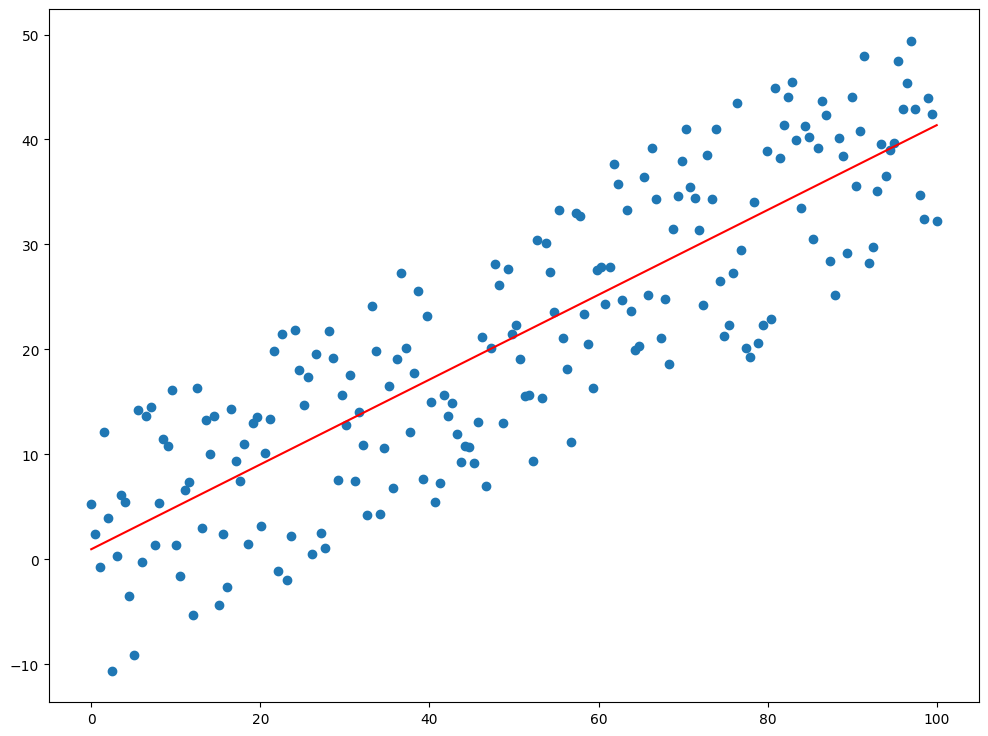

In [ ]:
lr = 0.0001

# Fit for 10,000 epochs
model = LinearRegressionGradientDescentModel(lr=lr, epochs=10000)

model.fit(X, Y)
Y_pred = model.predict(X)

plt.figure(figsize=(12, 9))
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color="red")
plt.show()